In [1]:
#project: p6
#submitter: gmcleod
#partner: none
#hours: 6
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

connect = sqlite3.connect("images.db")
df = pd.read_sql("""
SELECT file_name, district_name, lon, lat, water_ratio, forest_ratio, agriculture_ratio, developed_ratio FROM sample INNER JOIN districts ON districts.district_id = sample.district_id LIMIT 400
""", connect)

train, test = train_test_split(df, random_state=0)

In [2]:
#q1
test[-5:]

,file_name,district_name,lon,lat,water_ratio,forest_ratio,agriculture_ratio,developed_ratio
146,area0146.npy,district 08,-87.869312,44.365150,0.0048,0.0249,0.8343,0.0896
135,area0135.npy,district 06,-87.852985,43.935362,0.0030,0.0463,0.8241,0.0697
390,area0390.npy,district 01,-88.908064,42.562049,0.0000,0.1818,0.6871,0.0763
264,area0264.npy,district 01,-87.842951,42.704875,0.0030,0.0376,0.0423,0.8906
364,area0364.npy,district 01,-87.987364,42.754155,0.0025,0.0498,0.8408,0.0689


<AxesSubplot:xlabel='water_ratio', ylabel='developed_ratio'>

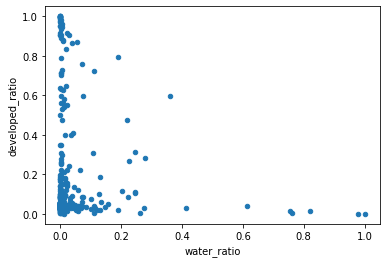

In [3]:
#q2

df.plot.scatter(x="water_ratio", y="developed_ratio")

In [4]:
#q3
df2 = test.copy()
L1 = LinearRegression()
L1.fit(train[["lat","lon","water_ratio","forest_ratio","agriculture_ratio"]],train["developed_ratio"])
df2["predicted"] = L1.predict(test[["lat","lon","water_ratio","forest_ratio","agriculture_ratio"]])
df2[:5]

,file_name,district_name,lon,lat,water_ratio,forest_ratio,agriculture_ratio,developed_ratio,predicted
132,area0132.npy,district 06,-87.940213,43.750300,0.0058,0.0266,0.5506,0.2990,0.187514
309,area0309.npy,district 07,-91.854009,45.352143,0.0002,0.1366,0.8074,0.0401,-0.155128
341,area0341.npy,district 01,-88.294035,42.656175,0.0010,0.3283,0.2029,0.1805,0.376093
196,area0196.npy,district 06,-89.557249,44.187877,0.0000,0.0836,0.8079,0.0412,-0.054414
246,area0246.npy,district 05,-88.596203,43.159942,0.0002,0.0201,0.6677,0.0921,0.188176


In [5]:
#q4
L1.score(test[["lat","lon","water_ratio","forest_ratio","agriculture_ratio"]],test["developed_ratio"])

0.7138077753811825

<AxesSubplot:xlabel='developed_ratio', ylabel='predicted'>

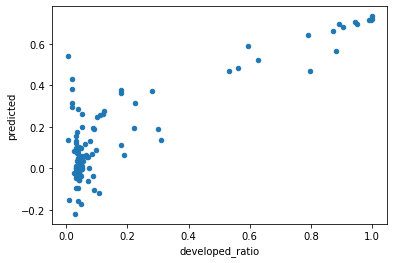

In [6]:
#q5
df2.plot.scatter(x="developed_ratio",y="predicted")

<AxesSubplot:>

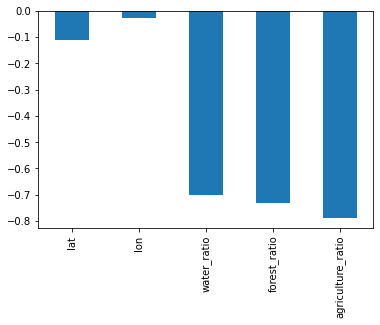

In [7]:
#q6
s2 = pd.Series(L1.coef_,index = ["lat","lon","water_ratio","forest_ratio","agriculture_ratio"])
s2.plot.bar()

In [8]:
#q7
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import make_column_transformer

P1 = Pipeline([("both",make_column_transformer((OneHotEncoder(),["district_name"]),
              (PolynomialFeatures(),["water_ratio","forest_ratio","agriculture_ratio"]),
                                             remainder = "passthrough")),
              ("lr",L1)])

fit = P1.fit(train[["district_name","lat","lon","water_ratio","forest_ratio","agriculture_ratio"]],train["developed_ratio"])
fit.score(test[["district_name","lat","lon","water_ratio","forest_ratio","agriculture_ratio"]],test["developed_ratio"])

0.8420970788505492

In [9]:
#q8
scores1 = cross_val_score(L1,train[["lat","lon","water_ratio","forest_ratio","agriculture_ratio"]], train["developed_ratio"], cv=8)
scores2 = cross_val_score(P1,train[["district_name","lat","lon","water_ratio","forest_ratio","agriculture_ratio"]], train["developed_ratio"], cv=8)
(scores1.mean(),scores2.mean())

(0.6517545836308132, 0.7882683505969759)

In [10]:
#q9
(scores1.std(),scores2.std())

(0.11307460959365212, 0.0666752521147791)

In [11]:

connect = sqlite3.connect("images.db")
df = pd.read_sql("""
SELECT file_name, district_name, lon, lat, water_ratio, forest_ratio, agriculture_ratio, developed_ratio FROM sample INNER JOIN districts ON districts.district_id = sample.district_id
""", connect)

train, test = train_test_split(df, random_state=0)

In [12]:
import zipfile
import io
import numpy as np
with zipfile.ZipFile("images.zip") as zf:
    for i in range(400,len(df)):
        filename = df.iloc[i]["file_name"]
        with zf.open(filename) as f:
            buf = io.BytesIO(f.read())
            map_array = np.load(buf)
            df.loc[i,"water_ratio"] = np.count_nonzero(map_array == 11)/np.sum(map_array!=-1)
            df.loc[i,"forest_ratio"] = np.count_nonzero((map_array >= 41) & (map_array <=43))/np.sum(map_array!=-1)
            df.loc[i,"agriculture_ratio"] = np.count_nonzero((map_array>=81) & (map_array<=82))/np.sum(map_array!=-1)
            df.loc[i,"developed_ratio"] = np.count_nonzero((map_array>=21) & (map_array<=24))/np.sum(map_array!=-1)
                    

In [13]:
#q10

with zipfile.ZipFile("images.zip") as zf:
    with zf.open("area1234.npy") as f:
        buf = io.BytesIO(f.read())
        map_array = np.load(buf)
        result = np.count_nonzero(map_array==52)
result

80

In [14]:
#q11
train, test = train_test_split(df,random_state=0)
test[-5:]

,file_name,district_name,lon,lat,water_ratio,forest_ratio,agriculture_ratio,developed_ratio
936,area0936.npy,district 03,-92.152574,44.502114,0.0000,0.4248,0.5276,0.0396
1524,area1524.npy,district 02,-90.151901,43.211515,0.0002,0.1870,0.7766,0.0344
1415,area1415.npy,district 05,-88.921017,43.197963,0.0001,0.0543,0.6463,0.0305
1223,area1223.npy,district 04,-87.906383,43.074510,0.0145,0.0169,0.0060,0.9189
1548,area1548.npy,district 03,-90.359220,43.570773,0.0000,0.2854,0.6702,0.0395


In [15]:
#q12
scores1 = cross_val_score(L1,train[["lat","lon","water_ratio","forest_ratio","agriculture_ratio"]], train["developed_ratio"], cv=8)
scores2 = cross_val_score(P1,train[["district_name","lat","lon","water_ratio","forest_ratio","agriculture_ratio"]], train["developed_ratio"], cv=8)
(scores1.mean(),scores2.mean())

(0.7729881088121584, 0.8843885851239318)

In [16]:
from matplotlib.colors import ListedColormap

def get_usage_colormap():
    use_cmap = np.zeros(shape=(256,4))
    use_cmap[:,-1] = 1
    uses = np.array([
        [0, 0.00000000000, 0.00000000000, 0.00000000000],
        [11, 0.27843137255, 0.41960784314, 0.62745098039],
        [12, 0.81960784314, 0.86666666667, 0.97647058824],
        [21, 0.86666666667, 0.78823529412, 0.78823529412],
        [22, 0.84705882353, 0.57647058824, 0.50980392157],
        [23, 0.92941176471, 0.00000000000, 0.00000000000],
        [24, 0.66666666667, 0.00000000000, 0.00000000000],
        [31, 0.69803921569, 0.67843137255, 0.63921568628],
        [41, 0.40784313726, 0.66666666667, 0.38823529412],
        [42, 0.10980392157, 0.38823529412, 0.18823529412],
        [43, 0.70980392157, 0.78823529412, 0.55686274510],
        [51, 0.64705882353, 0.54901960784, 0.18823529412],
        [52, 0.80000000000, 0.72941176471, 0.48627450980],
        [71, 0.88627450980, 0.88627450980, 0.75686274510],
        [72, 0.78823529412, 0.78823529412, 0.46666666667],
        [73, 0.60000000000, 0.75686274510, 0.27843137255],
        [74, 0.46666666667, 0.67843137255, 0.57647058824],
        [81, 0.85882352941, 0.84705882353, 0.23921568628],
        [82, 0.66666666667, 0.43921568628, 0.15686274510],
        [90, 0.72941176471, 0.84705882353, 0.91764705882],
        [95, 0.43921568628, 0.63921568628, 0.72941176471],
    ])
    for row in uses:
        use_cmap[int(row[0]),:-1] = row[1:]
    return ListedColormap(use_cmap)

Text(0.5, 1.0, 'Madison 2016')

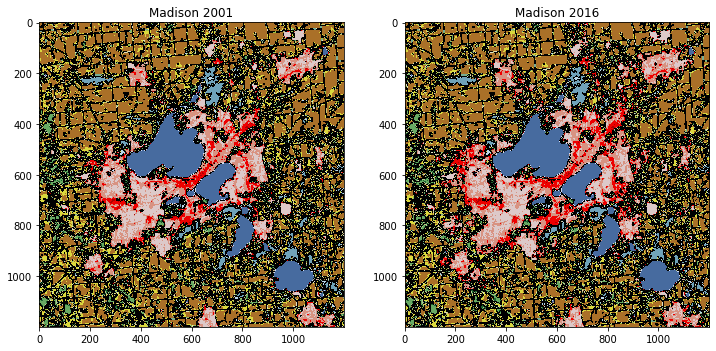

In [17]:
from matplotlib import pyplot as plt

with zipfile.ZipFile("madison.zip") as zf:
    with zf.open("year-2001.npy") as f:
        buf = io.BytesIO(f.read())
        mad2001 = np.load(buf)
    with zf.open("year-2016.npy") as f:
        buf = io.BytesIO(f.read())
        mad2016 = np.load(buf)

fig, axes = plt.subplots(ncols=2, figsize=(12,6))
axes[0].imshow(mad2001, vmin=0, vmax=255,cmap=get_usage_colormap())
axes[0].set_title("Madison 2001")
axes[1].imshow(mad2016, vmin=0, vmax=255,cmap=get_usage_colormap())
axes[1].set_title("Madison 2016")

In [18]:
#q13
mad2001.shape

(1200, 1200)

In [19]:
#q14
np.count_nonzero(mad2001 != mad2016) / np.sum(mad2001!=-1)

0.06156458333333333

In [20]:
#q15
import re
years = []
with zipfile.ZipFile("madison.zip") as zf:
    for file in zf.namelist():
        years.append(int(re.findall(r"\d{4}",file)[0]))
years    

[2001, 2004, 2006, 2008, 2011, 2013, 2016]

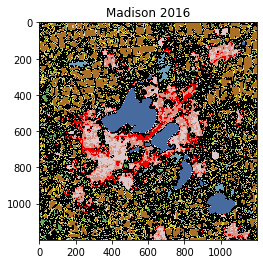

In [21]:
#q16
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML


bufs = []
with zipfile.ZipFile("madison.zip") as zf:
    for file in zf.namelist():
        with zf.open(file) as f:
            buf = io.BytesIO(f.read())
            bufs.append(np.load(buf))
            
fig,ax = plt.subplots()            

def draw_frame(frame_num):
    ax.imshow(bufs[frame_num],vmin=0,vmax=255,cmap = get_usage_colormap())
    ax.set_title("Madison " + str(years[frame_num]))

anim = FuncAnimation(fig,draw_frame,frames = 7, interval = 1000)
vid = anim.to_html5_video()
HTML(vid)